# Notebook 2: Zahlen voraussagen mit linearer Regression

**Lineare Regression** ist eine statistische Methode, die verwendet wird, um den Zusammenhang zwischen einer bestimmten Grösse und einer oder mehreren anderen Grössen zu modellieren. Dazu wird eine lineare Funktion entwickelt, die die gesammelten Beobachtungsdaten bestmöglich widerspiegelt.

Dieses Notebook besteht aus drei Lernaufgaben, welche Sie Schritt für Schritt an das Thema heranführen.

## Aufgabe 1: Prüfungsnote vorhersagen

Alice führt im Fach X über ihren Lernaufwand vor Prüfungen Buch. Nach zwei Prüfungen im neuen Semester vermutet sie, dass man die Note direkt über den Lernaufwand erklären kann.

| Lernaufwand (h) | Note |
| :-:| :-: | 
| 2.5          | 3    | 
| 3.5          | 5    |


**a)** Die unabhängige Variable ist der <br>__Lernaufwand__<br> und die abhängige Variable ist die <br>__Note__.<br><br>
**b)** Leiten Sie für den Lernaufwand (x-Achse) und Note (y-Achse) eine lineare Funktion her, die beide Datenpunkte verbindet. Was für eine Note kann Alice erwarten, wenn sie für die nächste Prüfung zwei Stunden lernt?

Tipp: Die Formel zur Berechnung der Steigung einer linearen Funktion, welche die Punkte $(x_1, y_1)$ und $(x_2, y_2)$ verbindet, lautet $m = \frac{y_2 - y_1}{x_2 - x_1}$.

In [1]:
# Hier Python-Code eingeben
def f(x):
    return 2*x + 2

**c)** Um etwas aussagekräftigere Resultate zu erhalten, ergänzt Alice die Tabelle mit den Daten aller Prüfungen aus vergangenen Semestern. Durch Probieren findet sie die lineare Funktion $y=\frac{7}{8}x + \frac{3}{2}$, welche die Datenpunkte gut zu approximieren scheint. Berechnen Sie den vertikalen Abstand des Datenpunkts `(4, 3.8)` von der Geraden.

In [2]:
# Hier Python-Code eingeben

## NO FUCKING IDEA

**d)** Durch einen Tipp einer Mitschülerin erfährt Alice, dass es ein Verfahren namens **einfache lineare Regression** gibt, welches die Summe der Abstände zwischen einer Geraden und die durch sie approximierte Datenpunkte minimiert. Um befriedigende Resultate zu erhalten, müssen die Datenpunkte jedoch ungefähr in einem **postiven oder negativen linearen Zusammenhang** stehen.

* **Positiv linear** bedeutet "Je **grösser** die unabhängige Variable $x$, desto **grösser** die abhängige Variable $y$".
* **Negativ linear** bedeutet "Je **grösser** die unabhängige Variable $x$, desto **kleiner** die abhängige Variable $y$".

Lesen Sie mit Hilfe von pandas die Datenpunkte in `noten.csv` ein und überprüfen Sie die Linearität mit Hilfe eines Streudiagramms.

<Axes: xlabel='lernaufwand', ylabel='note'>

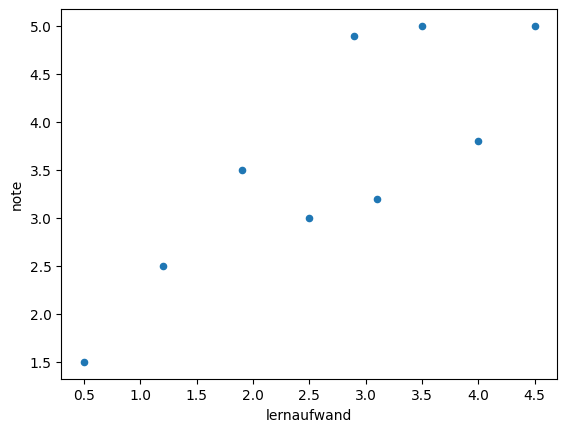

In [3]:
# Hier Python-Code eingeben
import pandas as pd

noten = pd.read_csv("./datasets/noten.csv")

noten.plot.scatter(x="lernaufwand", y="note")

**e)** Für $n$ Datenpunkte $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ sehen die Formeln zur Berechnung der Steigung $m$ und des Achsenabschnitts $q$ der Regressionsgeraden folgendermassen aus (siehe vollständige Herleitung im Appendix unten):

$m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}$

$q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(}m \text{ mit Resultat von oben ersetzen)}$

Um die Formeln nicht selber ausprogrammieren zu müssen, greift Alice auf das Statistik-Paket `statsmodels` zurück.

<div class="alert alert-block alert-info">
<img align="right" src="https://balloon.tam.ch/share/9058321257cfeaff89a072cc2694cb3e" alt="statsmodels" width="200" />
<strong>Neues Paket: statsmodels</strong>

Statsmodels ist eine leistungsstarke Python-Bibliothek, die eine breite Palette an statistischen Modellen und Testverfahren für die Datenanalyse bietet. Sie ermöglicht es Benutzern, statistische Modelle zu schätzen, statistische Tests durchzuführen und Datenexploration zu betreiben. Mit einer Vielzahl von Modellen wie linearen Regressionen und Zeitreihenanalysen unterstützt Statsmodels sowohl die Forschung als auch die Entwicklung statistischer Anwendungen. Die Bibliothek bietet detaillierte Ausgaben und Ergebnisse, die es ermöglichen, tiefe Einblicke in die Daten zu gewinnen.
</div>

In [4]:
import statsmodels.formula.api as smf # statsmodels als smf importieren

Um aus Datenpunkten die Steigung $m$ und den Achsenabschnitt $q$ der Regressionsgeraden zu erhalten, rufen wir die statsmodels-Befehle `ols()` (für *ordinary least squares* resp. gewöhnliche kleinste Quadrate) und `fit()` ("\[das Modell an die Daten\] anpassen") nacheinander auf. (Diese Art von Verkettung von Befehlen nennt man in der Informatik *method chaining*.)

Dem Befehl `ols()` übergeben wir zwei Schlüsselwort-Argumente:

* `formula`: Die Formel für die multiple lineare Regression als Zeichenkette (Text). Drei Sachen gilt es dabei zu beachten:
  1. Statt $x$ und $y$ werden die Namen der unabhängigen und abhängigen Variablen verwendet, also `lernaufwand` und `note`.
  2. Das Gleichheitszeichen wird dabei mit dem Tildesymbol `~` ersetzt. 
  3. Die Steigung $m$ und der Achsenabschnitt $q$ werden nicht notiert.
 
  Die Funktion $y = mx + q$ wird somit als `'note ~ lernaufwand'` codiert.
* `data`: Der Datensatz

Rufen Sie in der Befehlsfolge `smf.ols().fit()` den Befehl `ols()` mit den Schlüsselwort-Argumenten `formula` und `data` auf und weisen sie die Rückgabe der Variablen `lm` (für *linear model*) zu. Wenn alles geklappt hat, können Sie anschliessend mit `lm.params` den Wert für die Steigung und den Achsenabschnitt (engl. *intercept*) auslesen.

In [5]:
# Hier Python-Code eingeben
lm = smf.ols(formula="note ~ lernaufwand", data=noten).fit()

lm.params

# Intercept = q
# lernaufwand = m

Intercept      1.528690
lernaufwand    0.773518
dtype: float64

**f)** Verwenden Sie den Befehl `lm.predict()`, um die Note bei 4 Stunden Lernzeit vorherzusagen.

In [6]:
# Eine allein stehende Spalte (Series) mit einem Namen 'lernaufwand' und dem Wert 4 erstellen
s = pd.Series([4], name='lernaufwand')
# Hier Python-Code eingeben
lm.predict(s) # Vorhersage für den Wert 4 machen

0    4.622763
dtype: float64

**Antwort**: *hier doppelklicken und Antwort eingeben*

Es wird eine 4.62 vorhergesagt.

**g)** Führen Sie die Zelle unten aus, um mit `matplotlib` die Datenpunkte und die Regressionsgerade zu zeichnen.

C:\Users\fiedl\AppData\Local\Temp\ipykernel_23540\1790264975.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.note_vorausgesagt = m * data.lernaufwand + q


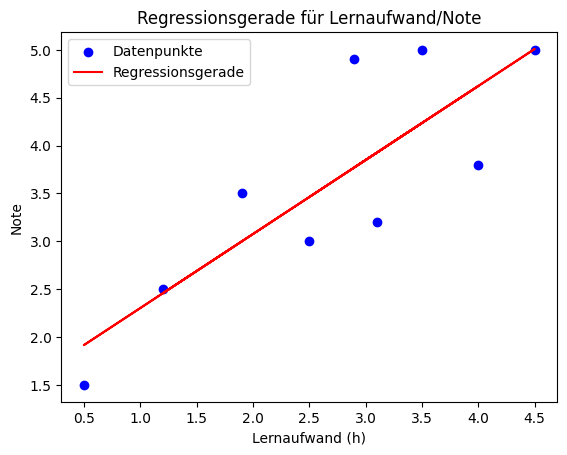

In [7]:
import matplotlib.pyplot as plt

# m (Steigung) und q (Achsenabschnitt) definieren
m = lm.params["lernaufwand"]
q = lm.params["Intercept"]

data = noten

# Berechne die vorhergesagten Noten in einer neuen Spalte
data.note_vorausgesagt = m * data.lernaufwand + q

# Erstelle ein Streudiagramm der originalen Daten
plt.scatter(data.lernaufwand, data.note, color="blue", label="Datenpunkte")

# Zeichne die Regressionslinie
plt.plot(data.lernaufwand, data.note_vorausgesagt, color="red", label="Regressionsgerade")

# Füge Titel und Beschriftungen hinzu
plt.title("Regressionsgerade für Lernaufwand/Note")
plt.xlabel("Lernaufwand (h)")
plt.ylabel("Note")

# Füge eine Legende hinzu
plt.legend()

## Aufgabe 2: Trinkgeld voraussagen

Verwenden Sie den Datensatz `tips.csv`, um mit Hilfe von linearer Regression aus dem Rechnungsbetrag `total_bill` das Trinkgeld `tip` vorherzusagen.

**a)** Lesen Sie die Daten ein und überprüfen Sie mit Hilfe eines Streudiagramms den linearen Zusammenhang der Variablen.

<Axes: xlabel='total_bill', ylabel='tip'>

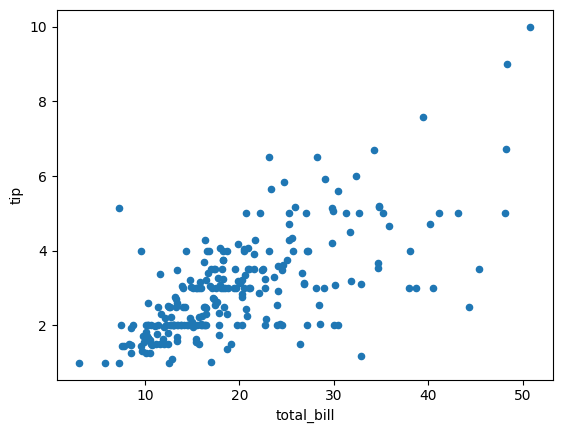

In [8]:
# Hier Python-Code eingeben
tips = pd.read_csv("./datasets/tips.csv")

tips.plot.scatter(x="total_bill", y="tip")

**b)** Erstellen Sie mit Hilfe von statsmodels ein lineares Modell und geben Sie die Werte für $m$ und $q$ aus.

In [9]:
# Hier Python-Code eingeben
linear_model = smf.ols(formula="tip ~ total_bill", data=tips).fit()
linear_model.params


Intercept     0.920270
total_bill    0.105025
dtype: float64

**c)** Sagen Sie das Trinkgeld für eine Rechnung der Höhe Fr. 120 voraus.

In [10]:
# Hier Python-Code eingeben
tip_series = pd.Series([120], name="total_bill")
linear_model.predict(tip_series)


0    13.523212
dtype: float64

**d)** Erstellen Sie ein Diagramm mit den Datenpunkten und der Regressionsgeraden.

C:\Users\fiedl\AppData\Local\Temp\ipykernel_23540\1754432373.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tips.evtl_tip = m * tips.total_bill + q


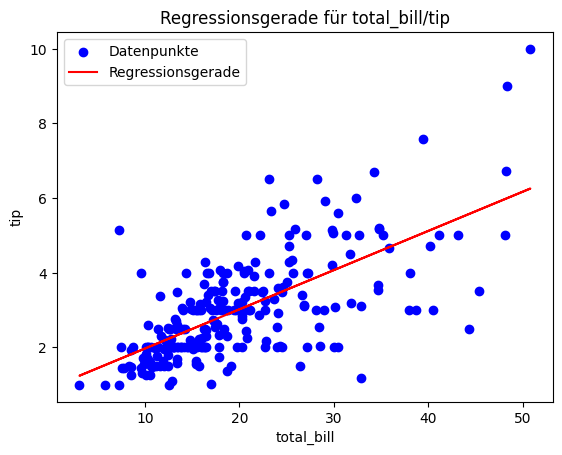

In [11]:
# Hier Python-Code eingeben
m = linear_model.params["total_bill"]
q = linear_model.params["Intercept"]

tips.evtl_tip = m * tips.total_bill + q

# Erstelle ein Streudiagramm der originalen Daten
plt.scatter(tips.total_bill, tips.tip, color="blue", label="Datenpunkte")

# Zeichne die Regressionslinie
plt.plot(tips.total_bill, tips.evtl_tip, color="red", label="Regressionsgerade")

# Füge Titel und Beschriftungen hinzu
plt.title("Regressionsgerade für total_bill/tip")
plt.xlabel("total_bill")
plt.ylabel("tip")

# Füge eine Legende hinzu
plt.legend()

## Aufgabe 3: Profit von Startups voraussagen

In dieser Aufgabe analysieren wir den Datensatz [50 Startups](https://www.kaggle.com/farhanmd29/50-startups) von der Plattform Kaggle. Über die unabhängigen Variablen `rd` (Forschungsausgaben), `admin` (administrative Aufwände) und `marketing` (Marketing-Ausgaben) versuch wir, die abhängige Variable `profit` von amerikanischen Tech-Startups vorauszusagen. (Die Spalte `state` lassen wir weg.)

Wenn man für die lineare Regression zwei oder mehr unabhängige Variablen verwendet, spricht man von **multipler linearer Regression**. Bei $n$ verschiedenen unabhängigen Varialben $x_1, x_2, \ldots, x_n$ wird zur Modellierung eine lineare Funktion vom Typ $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$ verwendet. Statt einer Geraden repräsentiert sie eine *Ebene* in einem mehrdimensioanlen Raum (=Hyperebene).

**a)** Lesen Sie den Datensatz mit pandas ein und überprüfen Sie für jede unabhängige Variable separat, ob sie in einem linearen Zusammenhang zur abhängigen Variable `profit` steht.

In [12]:
# Hier Python-Code eingeben

**b)** Erstellen Sie mit Hilfe von statsmodels ein lineares Modell. Gibt es mehr als eine unabhängige Variable, werden sie im Schlüssel-Argument `formula` von `ols()` mit `+` verbunden, also `'profit ~ rd + marketing'`.

In [13]:
# Hier Python-Code eingeben

**c)** Wie viel Profit macht gemäss dem Modell ein Startup, das je $1000000 für R&D und Marketing ausgibt?

Tipp: Verwenden Sie für die Vorhersage das `DataFrame` `df` unten.

In [14]:
# Erstelle ein DataFrame mit spezifischen Spalten und einem Datensatz
df = pd.DataFrame({'rd': [1000000], 'marketing': [1000000]})

# Hier Python-Code eingeben

<div class="alert alert-block alert-info">
<strong>Kontrollfragen</strong>

1. Was versteht man unter der *abhängigen* Variablen? 
2. Was versteht man unter *unabhängigen* Variablen?
3. Was ist der Unterschied zwischen der *einfachen* linearen Regression und der *multiplen* linearen Regression?
4. Weshalb muss man die *Linearität* der unabhängigen Variablen überprüfen? Und wie macht man das?
5. Wozu verwendet man die Programmbibliothek *pandas*?
6. Wozu verwendet man die Programmbibliothek *statsmodels*?
7. Was versteht man unter einem statistischen Modell?
</div>

## Appendix: Herleitung der Formeln für die einfache lineare Regression

### Definition der Zielfunktion
Das Ziel der linearen Regression besteht darin, die bestmögliche Gerade $y = mx + q$ zu finden, die die Summe der quadrierten Residuen zwischen den vorhergesagten Werten und den tatsächlichen Datenpunkten minimiert. Die Summe der quadrierten Residuen $S$ wird definiert als:
$$
S = \sum_{i=1}^n (y_i - (mx_i + q))^2
$$

### Partielle Ableitungen
Um $S$ zu minimieren, nehmen wir die partiellen Ableitungen bezüglich $m$ und $q$ und setzen diese gleich Null.

#### Partielle Ableitung nach $m$
$$
\frac{\partial S}{\partial m} = \frac{\partial}{\partial m} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-x_i)
$$
$$
= -2 \sum_{i=1}^n x_i(y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung ergibt:
$$
\sum x_iy_i - m\sum x_i^2 - q\sum x_i = 0
$$
$$
\sum x_iy_i = m\sum x_i^2 + q\sum x_i \quad \text{(Gleichung 1)}
$$

#### Partielle Ableitung nach $q$
$$
\frac{\partial S}{\partial q} = \frac{\partial}{\partial q} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-1)
$$
$$
= -2 \sum (y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung ergibt:
$$
\sum y_i - m\sum x_i - nq = 0
$$
$$
\sum y_i = m\sum x_i + nq \quad \text{(Gleichung 2)}
$$

### Lösung der Gleichungen
Aus Gleichung 2:
$$
q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(Gleichung 3)}
$$
Einsetzen der Gleichung 3 in Gleichung 1:
$$
\sum x_iy_i = m\sum x_i^2 + \left(\frac{\sum y_i - m\sum x_i}{n}\right)\sum x_i
$$
$$
\sum x_iy_i = m\sum x_i^2 + \frac{(\sum y_i)\sum x_i}{n} - \frac{m(\sum x_i)^2}{n}
$$
Auflösen nach $m$:
$$
m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$
Bestimmen von $q$ über Einsetzen von $m$ in Gleichung 3:
$$
q = \frac{\sum y_i - m\sum x_i}{n}
$$